Problem Statement - Part I

Assignment Part-I <br />
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sklearn_metrics
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import os
import warnings
import math
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


<h4>Importing Data</hd>

In [132]:
train=pd.read_csv('train.csv')
train.shape

(1460, 81)

<h4>Missing Data Analysis </h4>

In [133]:
def missingValue(dataframe):
   missingDF=pd.DataFrame({"ColumnName":dataframe.columns,"MissingValuePercentage":['%.2f' % (a/len(dataframe)*100) for a in dataframe.isnull().sum()],
   "feature":["Continuous" if dataframe[col].dtype != 'O' else "Ordinal" for col in dataframe.columns ]}) 
   return missingDF
    

In [134]:
dt=missingValue(train)
print(dt[dt["MissingValuePercentage"]!="0.00"].sort_values(by="MissingValuePercentage",ascending=False))

      ColumnName MissingValuePercentage     feature
72        PoolQC                  99.52     Ordinal
74   MiscFeature                  96.30     Ordinal
6          Alley                  93.77     Ordinal
73         Fence                  80.75     Ordinal
64    GarageCond                   5.55     Ordinal
58    GarageType                   5.55     Ordinal
59   GarageYrBlt                   5.55  Continuous
60  GarageFinish                   5.55     Ordinal
63    GarageQual                   5.55     Ordinal
57   FireplaceQu                  47.26     Ordinal
32  BsmtExposure                   2.60     Ordinal
35  BsmtFinType2                   2.60     Ordinal
30      BsmtQual                   2.53     Ordinal
31      BsmtCond                   2.53     Ordinal
33  BsmtFinType1                   2.53     Ordinal
3    LotFrontage                  17.74  Continuous
26    MasVnrArea                   0.55  Continuous
25    MasVnrType                   0.55     Ordinal
42    Electr

In [135]:
len(dt[dt["MissingValuePercentage"]!="0.00"])

19

In [136]:
print(dt[dt["MissingValuePercentage"]!="0.00"].sort_values(by="MissingValuePercentage",ascending=False))
print("MiscFeature Unique:","\n",train.groupby('MiscFeature')["MiscFeature"].nunique().sort_values(ascending=False).reset_index(name="count"))
print(train.Alley.value_counts())


      ColumnName MissingValuePercentage     feature
72        PoolQC                  99.52     Ordinal
74   MiscFeature                  96.30     Ordinal
6          Alley                  93.77     Ordinal
73         Fence                  80.75     Ordinal
64    GarageCond                   5.55     Ordinal
58    GarageType                   5.55     Ordinal
59   GarageYrBlt                   5.55  Continuous
60  GarageFinish                   5.55     Ordinal
63    GarageQual                   5.55     Ordinal
57   FireplaceQu                  47.26     Ordinal
32  BsmtExposure                   2.60     Ordinal
35  BsmtFinType2                   2.60     Ordinal
30      BsmtQual                   2.53     Ordinal
31      BsmtCond                   2.53     Ordinal
33  BsmtFinType1                   2.53     Ordinal
3    LotFrontage                  17.74  Continuous
26    MasVnrArea                   0.55  Continuous
25    MasVnrType                   0.55     Ordinal
42    Electr


We have 19 columns in the dataset in which we have missing values, So let's analyse those
<h5>Observations</h5>
PoolQC=>99.52 In the data_description.txt we found that na means No Pool in the houses and it seems that on the 99% cases we have PoolQC is na so we can drop this. <br />
MiscFeature 96.30 We can drop miscfeature column because there are only 4 unique values and rest are Null values 
<br />
Alley 93.77 We can replace nan with No alley access. <br />
Fence 80.75 We can replace nan with No Fence. <br />
FireplaceQu 47.26 We can replace nan with No_Fireplace <br />




In [137]:
train.drop(["MiscFeature","PoolQC"],inplace=True,axis=1)

In [138]:
dt=missingValue(train)
print(dt[dt["MissingValuePercentage"]!="0.00"].sort_values(by="MissingValuePercentage",ascending=False))

      ColumnName MissingValuePercentage     feature
6          Alley                  93.77     Ordinal
72         Fence                  80.75     Ordinal
64    GarageCond                   5.55     Ordinal
63    GarageQual                   5.55     Ordinal
60  GarageFinish                   5.55     Ordinal
59   GarageYrBlt                   5.55  Continuous
58    GarageType                   5.55     Ordinal
57   FireplaceQu                  47.26     Ordinal
35  BsmtFinType2                   2.60     Ordinal
32  BsmtExposure                   2.60     Ordinal
33  BsmtFinType1                   2.53     Ordinal
31      BsmtCond                   2.53     Ordinal
30      BsmtQual                   2.53     Ordinal
3    LotFrontage                  17.74  Continuous
26    MasVnrArea                   0.55  Continuous
25    MasVnrType                   0.55     Ordinal
42    Electrical                   0.07     Ordinal


In [139]:
train.Alley.fillna("No_ALley",inplace=True)
train.Fence.fillna("No_Fence",inplace=True)
train.FireplaceQu.fillna("No_Fireplace",inplace=True)

In [140]:
dt=missingValue(train)
print(dt[dt["MissingValuePercentage"]!="0.00"].sort_values(by="MissingValuePercentage",ascending=False))

      ColumnName MissingValuePercentage     feature
58    GarageType                   5.55     Ordinal
59   GarageYrBlt                   5.55  Continuous
60  GarageFinish                   5.55     Ordinal
63    GarageQual                   5.55     Ordinal
64    GarageCond                   5.55     Ordinal
32  BsmtExposure                   2.60     Ordinal
35  BsmtFinType2                   2.60     Ordinal
30      BsmtQual                   2.53     Ordinal
31      BsmtCond                   2.53     Ordinal
33  BsmtFinType1                   2.53     Ordinal
3    LotFrontage                  17.74  Continuous
25    MasVnrType                   0.55     Ordinal
26    MasVnrArea                   0.55  Continuous
42    Electrical                   0.07     Ordinal


In [141]:
train.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

<AxesSubplot:xlabel='LotFrontage', ylabel='count'>

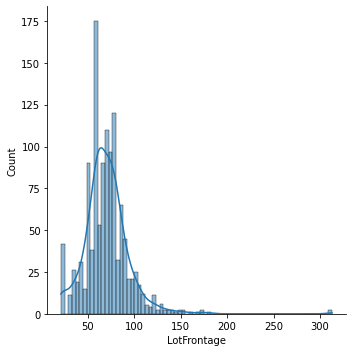

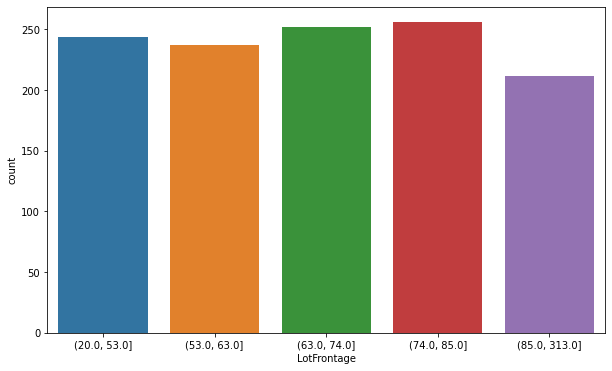

In [142]:

sns.displot(train.LotFrontage, kde=True)
plt.figure(figsize=(10, 6))
a = pd.qcut(train.LotFrontage, q=5, precision=0)
sns.countplot(a)

By looking into the chart we found that imputing null values with median will be good choice 

In [143]:
train.LotFrontage.fillna(train.LotFrontage.median(),inplace=True)

In [144]:
dt=missingValue(train)
print(dt[dt["MissingValuePercentage"]!="0.00"].sort_values(by="MissingValuePercentage",ascending=False))

      ColumnName MissingValuePercentage     feature
58    GarageType                   5.55     Ordinal
59   GarageYrBlt                   5.55  Continuous
60  GarageFinish                   5.55     Ordinal
63    GarageQual                   5.55     Ordinal
64    GarageCond                   5.55     Ordinal
32  BsmtExposure                   2.60     Ordinal
35  BsmtFinType2                   2.60     Ordinal
30      BsmtQual                   2.53     Ordinal
31      BsmtCond                   2.53     Ordinal
33  BsmtFinType1                   2.53     Ordinal
25    MasVnrType                   0.55     Ordinal
26    MasVnrArea                   0.55  Continuous
42    Electrical                   0.07     Ordinal


<AxesSubplot:xlabel='GarageYrBlt', ylabel='count'>

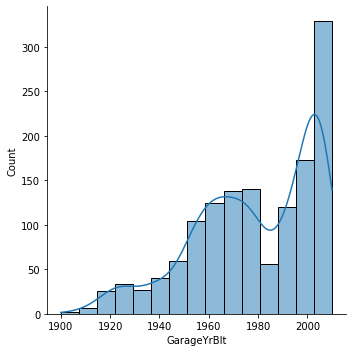

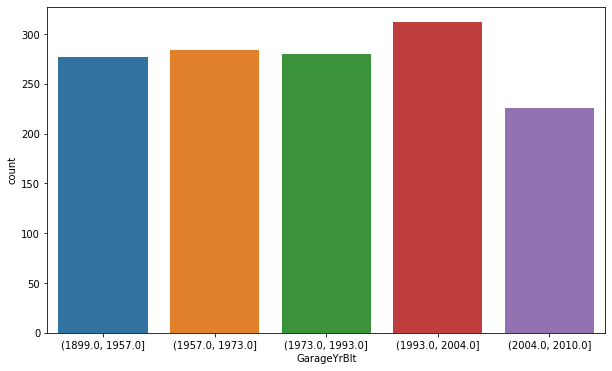

In [145]:
sns.displot(train.GarageYrBlt, kde=True)
plt.figure(figsize=(10, 6))
a = pd.qcut(train.GarageYrBlt, q=5, precision=0)
sns.countplot(a)

In [146]:
train.GarageYrBlt.fillna(train.GarageYrBlt.median(),inplace=True)

In [147]:
dt=missingValue(train)
print(dt[dt["MissingValuePercentage"]!="0.00"].sort_values(by="MissingValuePercentage",ascending=False))

      ColumnName MissingValuePercentage     feature
58    GarageType                   5.55     Ordinal
60  GarageFinish                   5.55     Ordinal
63    GarageQual                   5.55     Ordinal
64    GarageCond                   5.55     Ordinal
32  BsmtExposure                   2.60     Ordinal
35  BsmtFinType2                   2.60     Ordinal
30      BsmtQual                   2.53     Ordinal
31      BsmtCond                   2.53     Ordinal
33  BsmtFinType1                   2.53     Ordinal
25    MasVnrType                   0.55     Ordinal
26    MasVnrArea                   0.55  Continuous
42    Electrical                   0.07     Ordinal


In [148]:
train.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [149]:
train.MasVnrArea.fillna(train.MasVnrArea.median(),inplace=True)

In [150]:
dt=missingValue(train)
print(dt[dt["MissingValuePercentage"]!="0.00"].sort_values(by="MissingValuePercentage",ascending=False))

      ColumnName MissingValuePercentage  feature
58    GarageType                   5.55  Ordinal
60  GarageFinish                   5.55  Ordinal
63    GarageQual                   5.55  Ordinal
64    GarageCond                   5.55  Ordinal
32  BsmtExposure                   2.60  Ordinal
35  BsmtFinType2                   2.60  Ordinal
30      BsmtQual                   2.53  Ordinal
31      BsmtCond                   2.53  Ordinal
33  BsmtFinType1                   2.53  Ordinal
25    MasVnrType                   0.55  Ordinal
42    Electrical                   0.07  Ordinal


As we can see we have list of all ordinal data so we can replace all the null values at one go

In [151]:
for a in dt[dt["MissingValuePercentage"]!="0.00"].sort_values(by="MissingValuePercentage",ascending=False).ColumnName:
    train[a].fillna("No "+a,inplace=True)

In [152]:
dt=missingValue(train)
print(dt[dt["MissingValuePercentage"]!="0.00"].sort_values(by="MissingValuePercentage",ascending=False))

Empty DataFrame
Columns: [ColumnName, MissingValuePercentage, feature]
Index: []


In [153]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No_ALley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No_Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No_Fence,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No_ALley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No_Fence,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No_ALley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No_Fence,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No_ALley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No_Fence,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No_ALley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No_Fence,0,12,2008,WD,Normal,250000


We can drop id as it contain uniqueness

In [154]:
train.drop("Id",inplace=True,axis=1)

EDA and Visualisation on cleaned data

In [155]:
continuous_list=[col for col in train.columns if train[col].dtype != 'O']
ordinal_list=[col for col in train.columns if train[col].dtype == 'O']

Text(0.5, 0.98, 'Ordinal vs Sale Price Analysis')

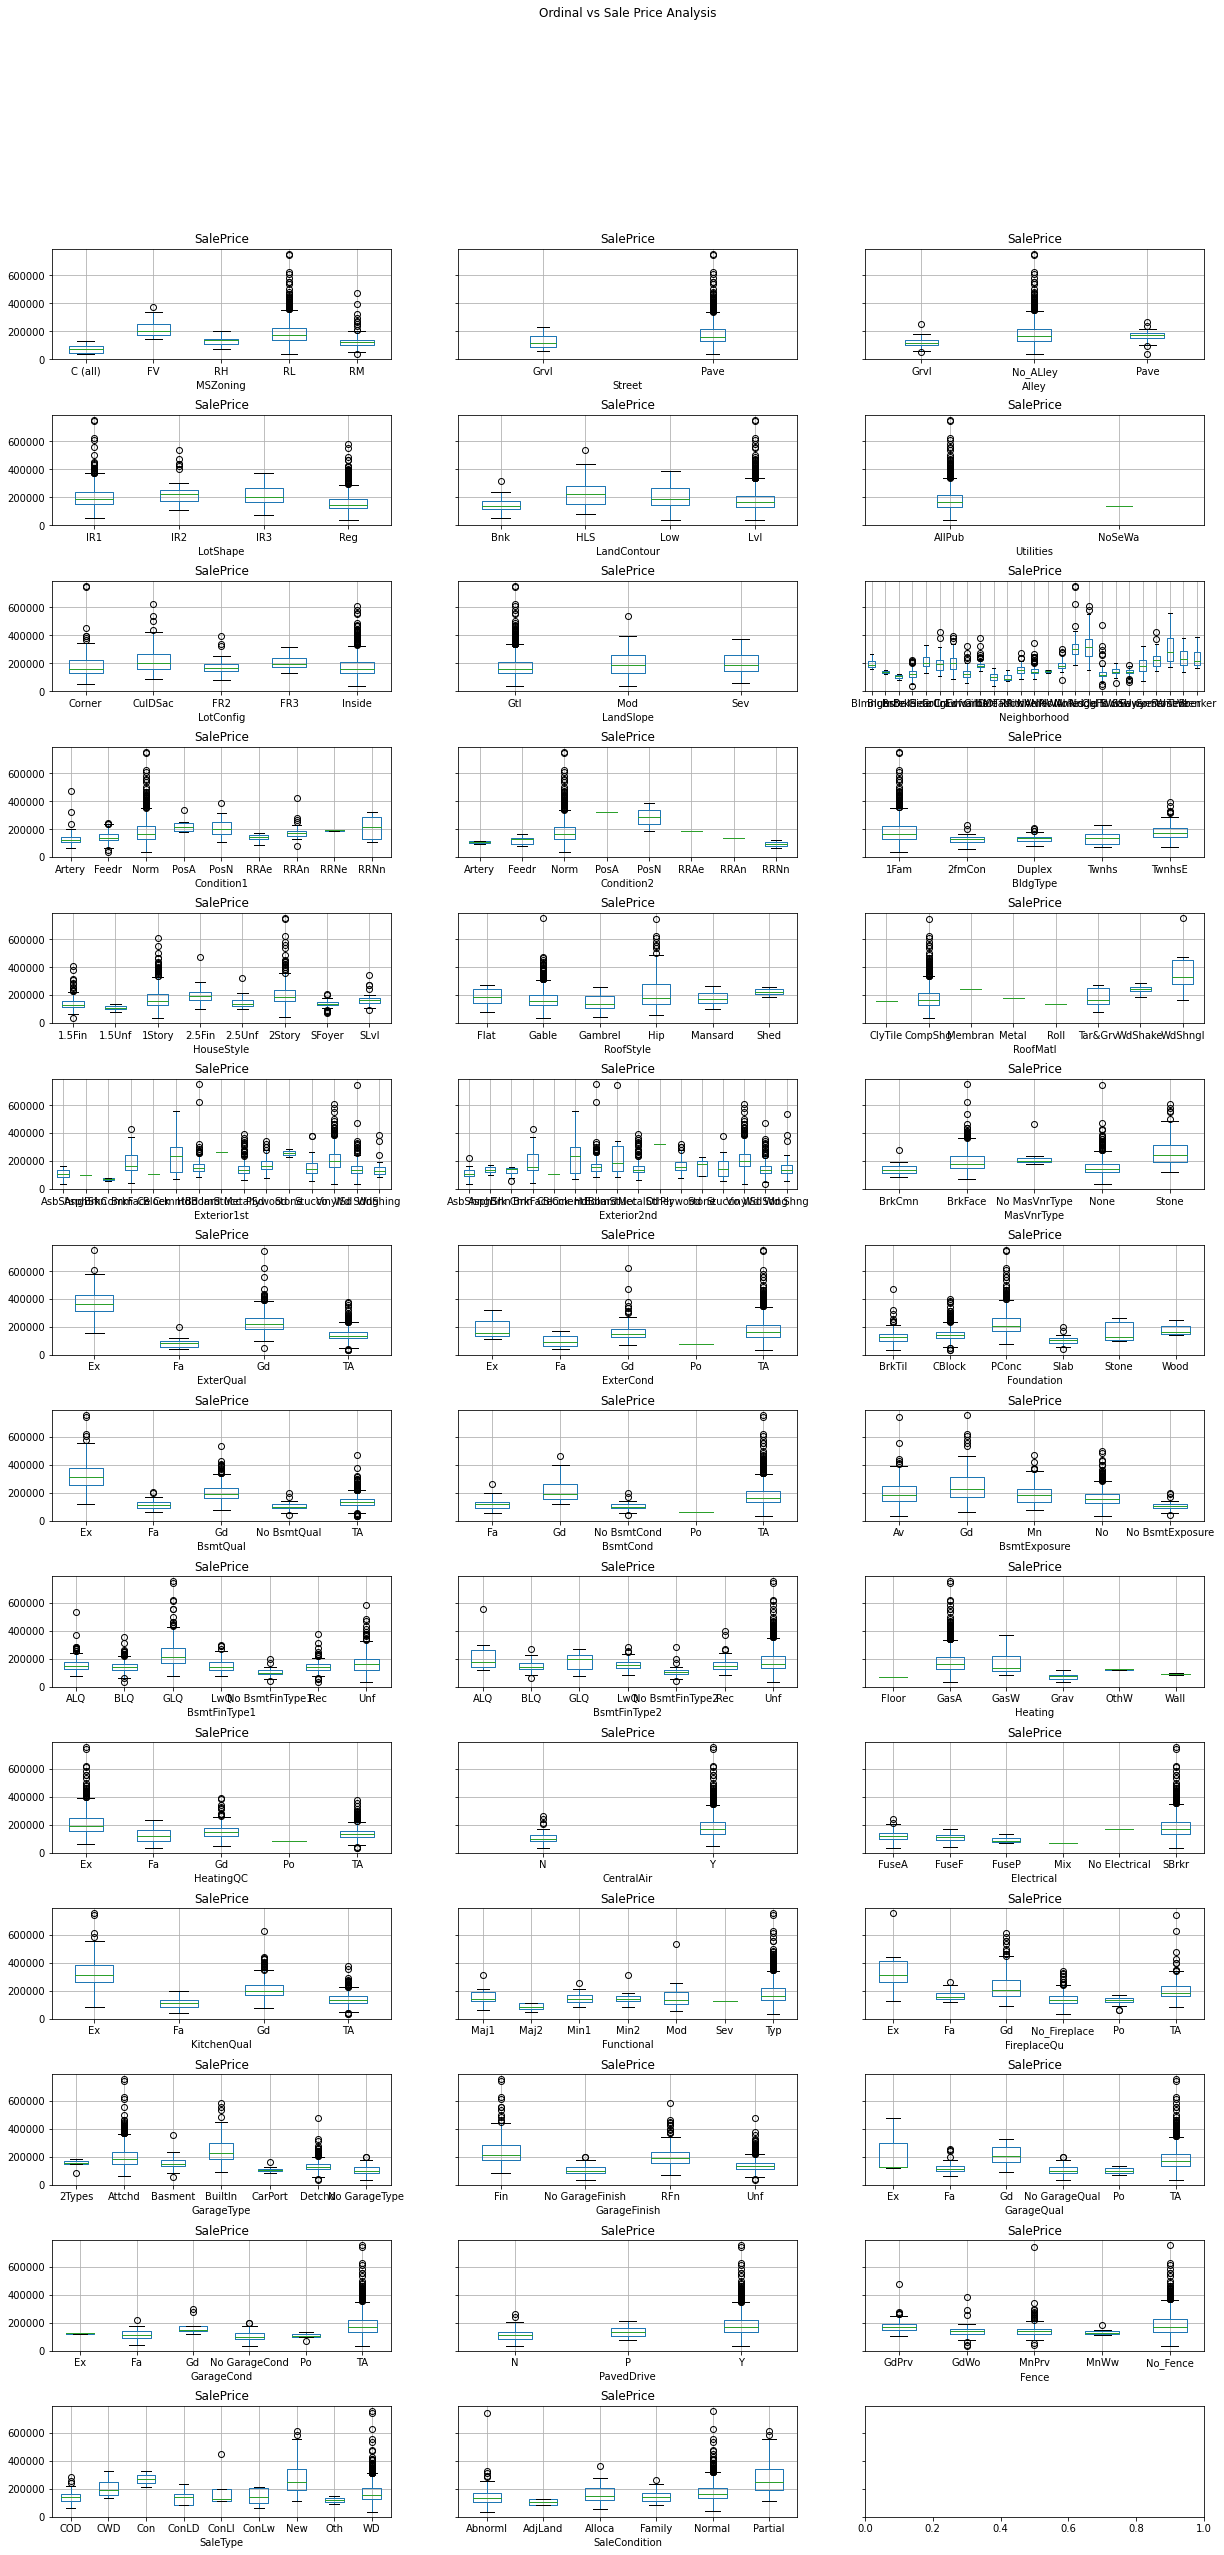

In [156]:

f, ax = plt.subplots(int(np.floor(len(ordinal_list)/3)+1), 3, 
                     figsize=(20, (np.floor(len(ordinal_list)/3)+1)*3),
                     sharey=True)
ax = np.ravel(ax)

plt.subplots_adjust(hspace=0.5)
for i in range(len(ordinal_list)):
    train.boxplot(column='SalePrice', by=ordinal_list[i], ax=ax[i])
plt.suptitle("Ordinal vs Sale Price Analysis")

Observation
* Houses which are near to Parks,Greenbeltsor any Offsite feature have High Sale Price

Text(0.5, 0.98, 'Continuous vs Sale Price Analysis')

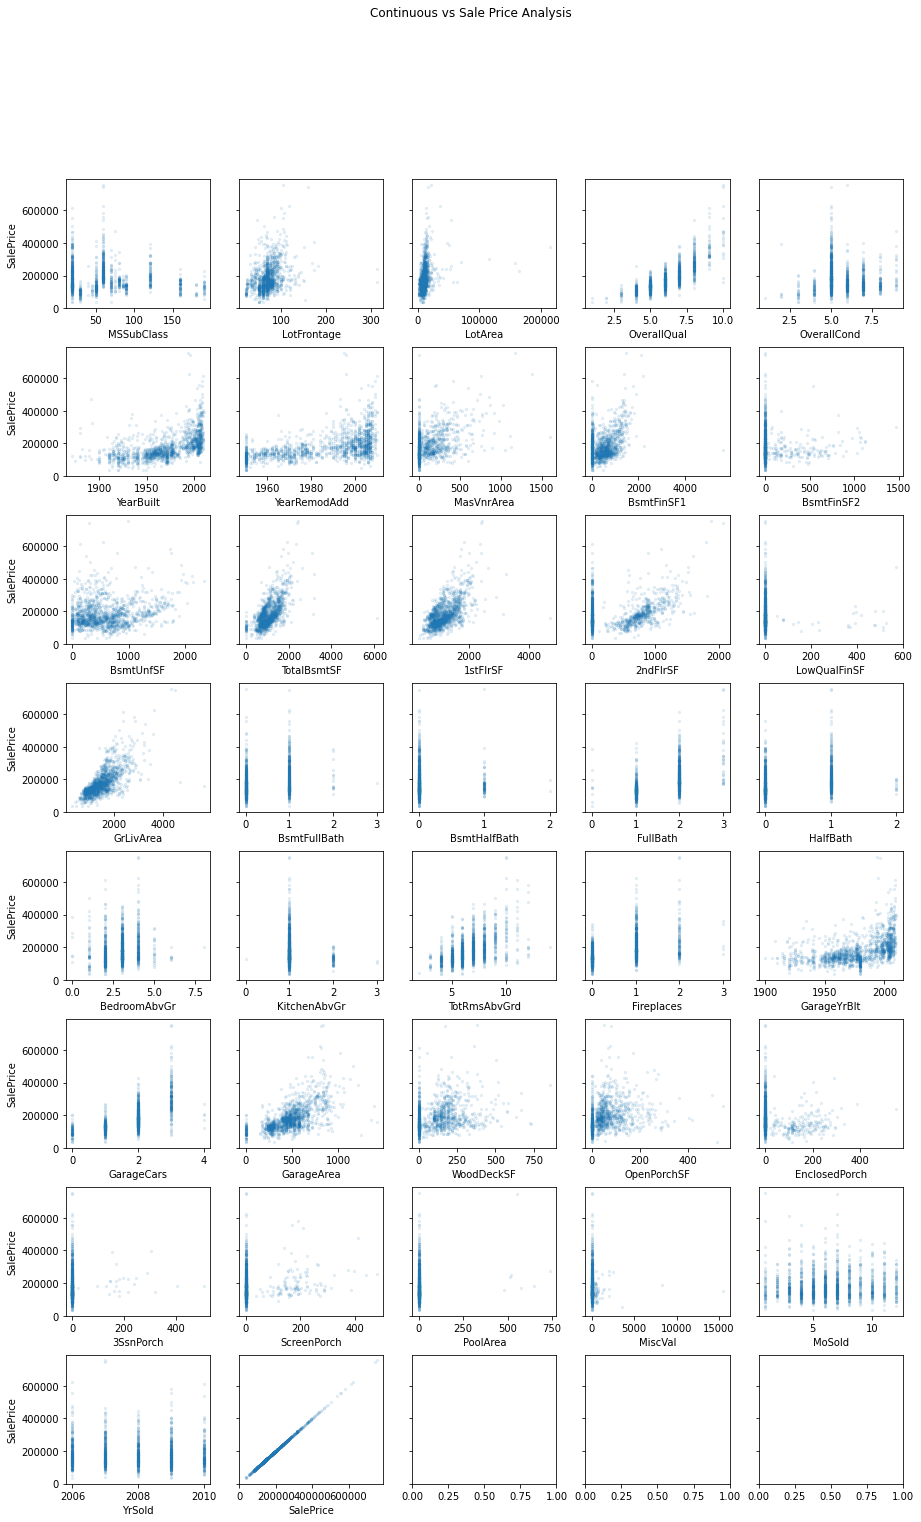

In [157]:
f, ax = plt.subplots(int(np.floor(len(continuous_list)/5))+1, 5, 
                     figsize=(15, int(np.floor(len(continuous_list)/5)+1)*3),
                     sharey=True)
ax = np.ravel(ax)

plt.subplots_adjust(hspace=0.3)

for i in range(len(continuous_list)):
    train.plot.scatter(x=continuous_list[i], y='SalePrice',
                      alpha=0.1, legend=True, s=5, ax=ax[i])
plt.suptitle("Continuous vs Sale Price Analysis")

Based on above figures saleprice seems to increase for houses that are recently build/modified. 

Observation
* Total Area of Basement,First Floor, Second Floor Areas and  total Basement Surface Area variable have the linear relationship with the Sale Price

<b>This means that the more these variables are in Quantity, the more is the Sale Price</b>

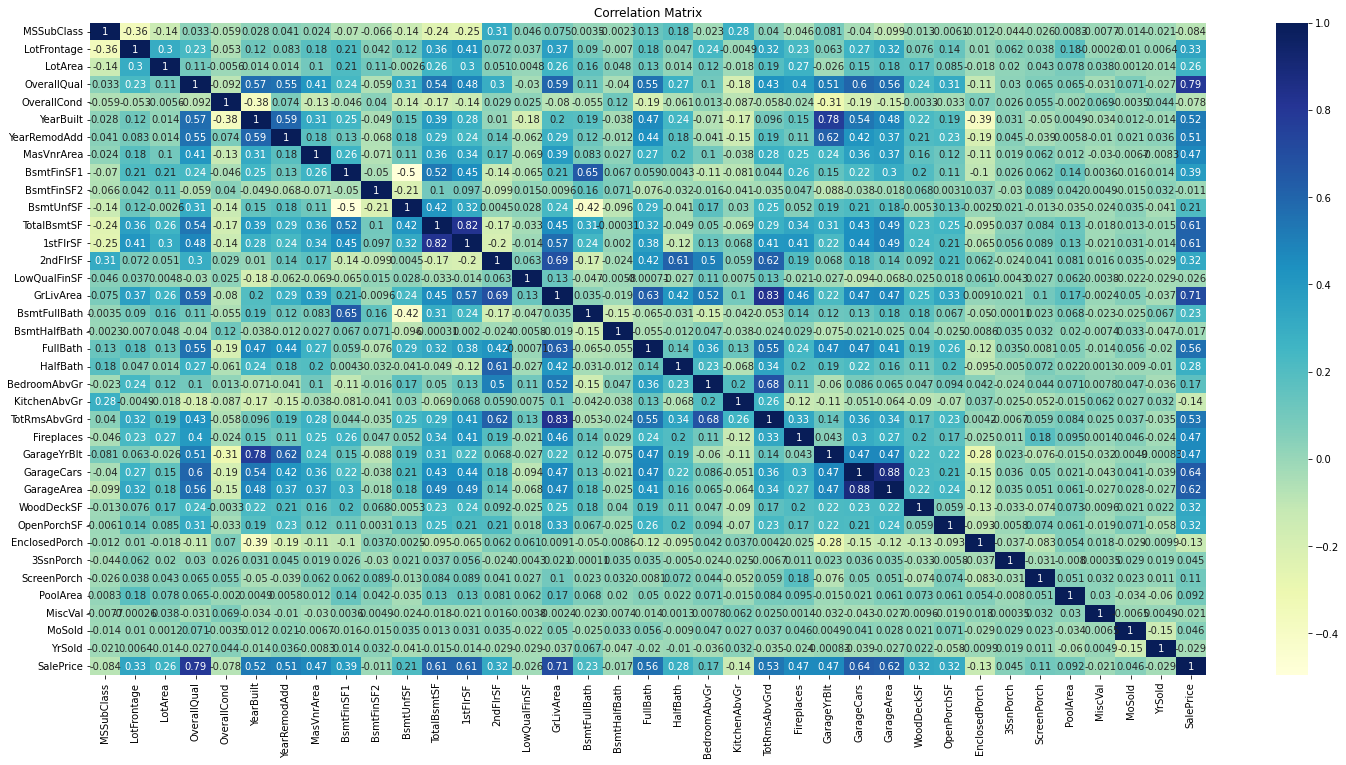

In [158]:
plt.figure(figsize = (25, 12))
sns.heatmap(train.corr(), annot = True, cmap="YlGnBu")
plt.title('Correlation Matrix')
plt.show()

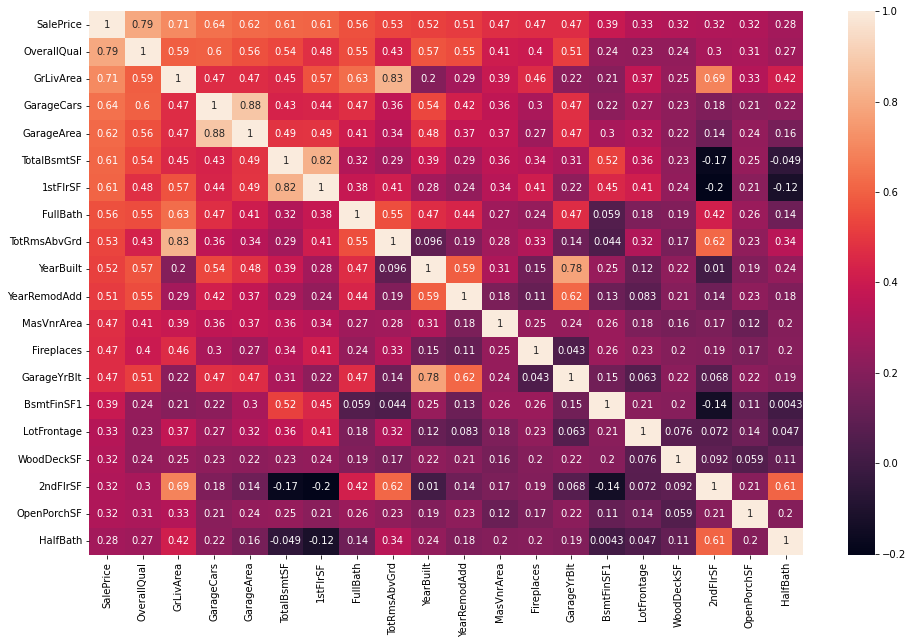

In [159]:
plt.figure(figsize = (16, 10))
n = 20 # number of variables which have the highest correlation with 'Sales price'
cols = train.corr().nlargest(n, 'SalePrice')['SalePrice'].index
sns.heatmap(train[cols].corr(),annot=True)
plt.show()

OverallQual GrLivArea are highly correlated with Saleprie

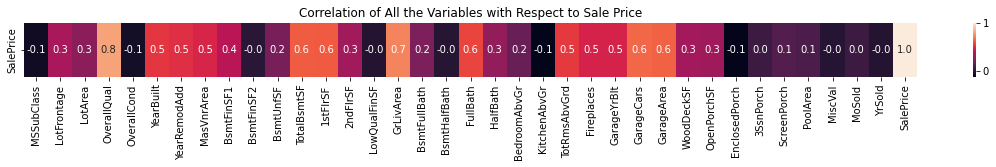

In [160]:
plt.figure(figsize=(20,1))
sns.heatmap(train.corr().sort_values(by=['SalePrice']).tail(1),annot=True,fmt='.1f');
plt.title('Correlation of All the Variables with Respect to Sale Price');

#### Dummying

In [161]:
train_dummies = pd.get_dummies(train.select_dtypes(include=['object']), drop_first=True)
train_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No_ALley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_No MasVnrType,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No BsmtQual,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No BsmtCond,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No BsmtExposure,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No BsmtFinType1,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No BsmtFinType2,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_No Electrical,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No_Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No GarageType,GarageFinish_No GarageFinish,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No GarageQual,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No GarageCond,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No_Fence,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,

In [162]:
train.drop(train.select_dtypes(include=['object']).columns,inplace=True,axis=1)

In [163]:
derivedDF=pd.concat([train, train_dummies], axis=1)

<h5> Outlier Analysis</h5>

In [164]:
def plot_multiple(df,list_of_cols,y):
    print('\x1b[0;4;30;42m' + 'Outlier Analysis on target variable SalePrice' '\x1b[0m')
    plt.figure(figsize=(20,100))
    x=1
    for i in list_of_cols:
        plt.subplot(int(len(list_of_cols)/3)+1,3,x)
        plt.subplots_adjust(wspace=0.4,hspace=1.0)
        sns.scatterplot(x = df[i],y=df[y])
 
        x = x+1
   

Outlier Analysis on target variable SalePrice


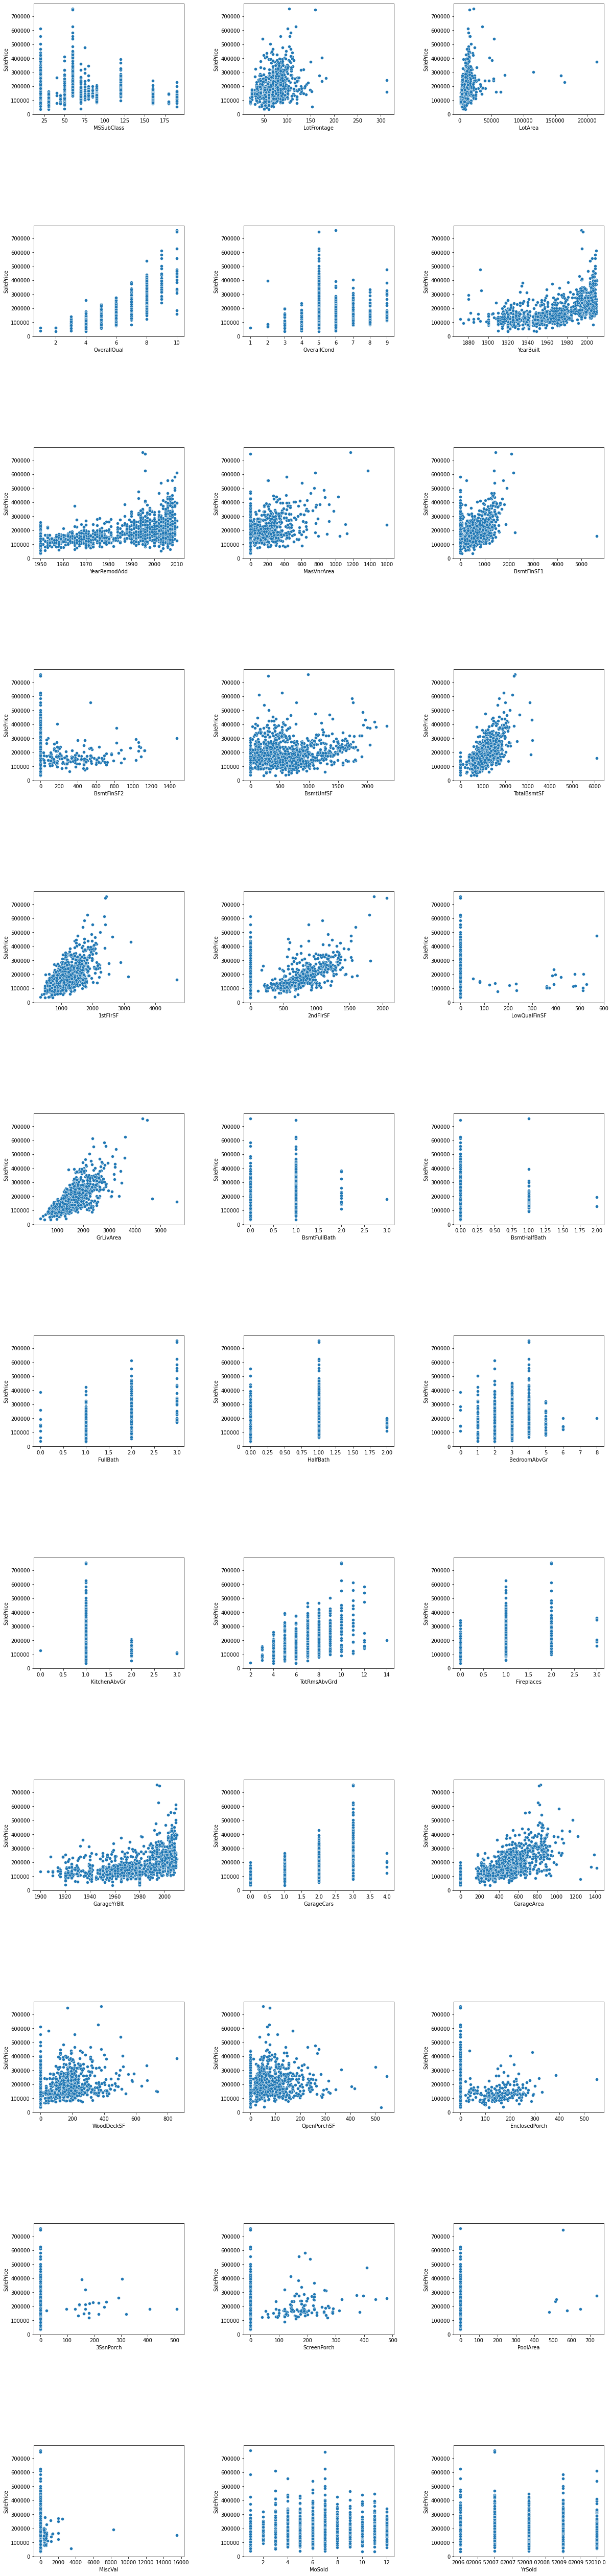

In [165]:
plot_multiple(derivedDF,[a for a in train.columns if a !="SalePrice"],"SalePrice")

As you can see on above charts we have outliers in each feature, so let's use IQR to remove outliers

In [166]:
derivedDF.shape

(1460, 255)

In [167]:
q1 = derivedDF.quantile(0.01)
q3 = derivedDF.quantile(0.99)
iqr=q3-q1

Multiply the interquartile range (IQR) by the number 1.5. Add 1.5 x (IQR) to the third quartile. Any number greater than this is a suspected outlier. Subtract 1.5 x (IQR) from the first quartile

In [168]:
iqrdf = derivedDF[~((derivedDF < (q1-1.5*iqr))|(derivedDF>(q3+1.5*iqr))).any(axis=1)]
iqrdf.shape

(1170, 255)

In the outlier treatment we lost almost 20% of data which is bearable, let's use the iqrdf for further analysis

##### Splitting the data into train and test sets

In [169]:
y = np.array(iqrdf.SalePrice)

In [170]:
x_train, x_test, y_train, y_test = train_test_split(iqrdf.drop('SalePrice',axis=1), y,test_size = 0.3, random_state=100)

In [171]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#### Ridge and Lasso Regression

#### Ridge Regression

In [239]:
parameters= {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
import sklearn.model_selection as ms
ridge = Ridge()
ridge_reg=GridSearchCV(ridge, param_grid=parameters, scoring='neg_mean_squared_error', cv=5,return_train_score=True)
ridge_reg.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [240]:
print('The Best value of Alpha is: ',ridge_reg.best_params_)
print('The Best score achieved : ',ridge_reg.best_score_)

The Best value of Alpha is:  {'alpha': 4.0}
The Best score achieved :  -486506094.68447876


We got best Alpha value 4, we can peform multiple comparison, let's try

In [185]:
ridge_1=Ridge(alpha=0.0001)
ridge_1.fit(x_train,y_train)
y_pred_train=ridge_1.predict(x_train)
y_pred_test=ridge_1.predict(x_test)
print('Root Mean Square Error train = ' + str(math.sqrt(sklearn_metrics.mean_squared_error(y_train, y_pred_train))))
print('Train R2 Score: ' + str(r2_score(y_train,y_pred_train)))
print('Test R2 Score: ' + str(r2_score(y_test,y_pred_test)))
print('Root Mean Square Error test = ' + str(math.sqrt(sklearn_metrics.mean_squared_error(y_test, y_pred_test))))  

Root Mean Square Error train = 17476.849265361125
Train R2 Score: 0.9438101624674544
Test R2 Score: 0.9085085809269314
Root Mean Square Error test = 24959.684102708106


In [187]:
ridge_2=Ridge(alpha=1)
ridge_2.fit(x_train,y_train)
y_pred_train=ridge_2.predict(x_train)
y_pred_test=ridge_2.predict(x_test)
print('Root Mean Square Error train = ' + str(math.sqrt(sklearn_metrics.mean_squared_error(y_train, y_pred_train))))
print('Train R2 Score: ' + str(r2_score(y_train,y_pred_train)))
print('Test R2 Score: ' + str(r2_score(y_test,y_pred_test)))
print('Root Mean Square Error test = ' + str(math.sqrt(sklearn_metrics.mean_squared_error(y_test, y_pred_test))))  

Root Mean Square Error train = 17610.68157200136
Train R2 Score: 0.9429462986864197
Test R2 Score: 0.9120302121674074
Root Mean Square Error test = 24474.604070034984


#### Alpha=4

In [188]:
ridge_3=Ridge(alpha=4)
ridge_3.fit(x_train,y_train)
y_pred_train=ridge_3.predict(x_train)
y_pred_test=ridge_3.predict(x_test)
print('Root Mean Square Error train = ' + str(math.sqrt(sklearn_metrics.mean_squared_error(y_train, y_pred_train))))
print('Train R2 Score: ' + str(r2_score(y_train,y_pred_train)))
print('Test R2 Score: ' + str(r2_score(y_test,y_pred_test)))
print('Root Mean Square Error test = ' + str(math.sqrt(sklearn_metrics.mean_squared_error(y_test, y_pred_test))))  

Root Mean Square Error train = 17958.764196888107
Train R2 Score: 0.9406686279667492
Test R2 Score: 0.9162667401866024
Root Mean Square Error test = 23877.997485075084


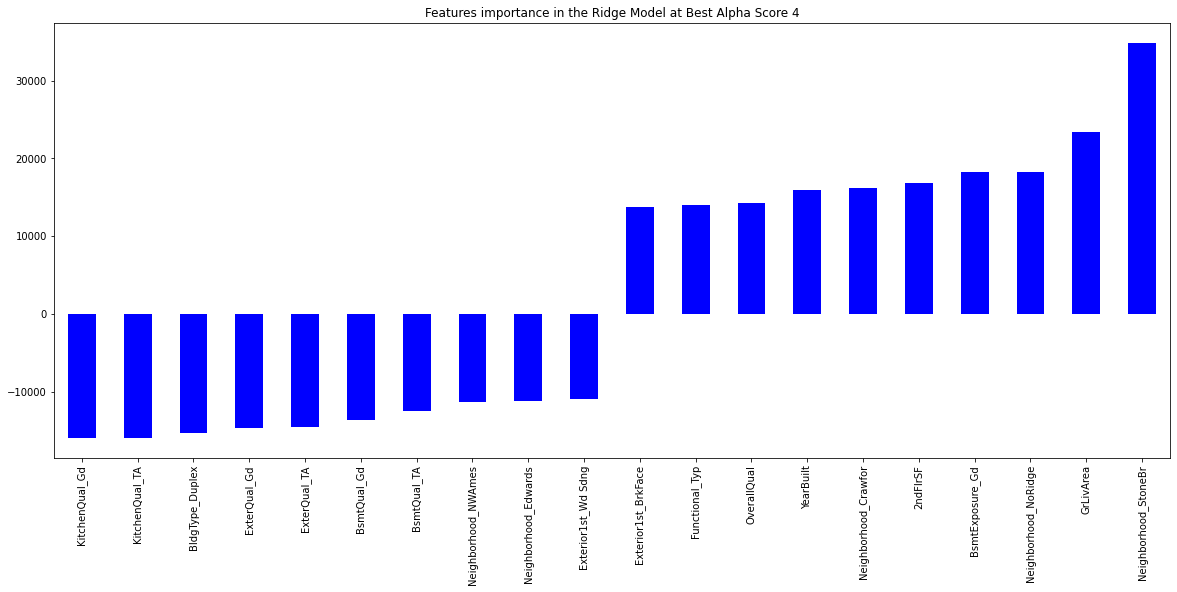

In [227]:
plt.figure(figsize=(20,8))
coefs = pd.Series(ridge_3.coef_, index = iqrdf.drop('SalePrice',axis=1).columns)
top10 = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
top10.plot(kind = "bar", color='blue')
plt.title("Features importance in the Ridge Model at Best Alpha Score 4")
plt.show()

##### Alpha=8  

In [210]:
ridge_4=Ridge(alpha=8)
ridge_4.fit(x_train,y_train)
y_pred_train=ridge_4.predict(x_train)
y_pred_test=ridge_4.predict(x_test)
print('Root Mean Square Error train = ' + str(math.sqrt(sklearn_metrics.mean_squared_error(y_train, y_pred_train))))
print('Train R2 Score: ' + str(r2_score(y_train,y_pred_train)))
print('Test R2 Score: ' + str(r2_score(y_test,y_pred_test)))
print('Root Mean Square Error test = ' + str(math.sqrt(sklearn_metrics.mean_squared_error(y_test, y_pred_test))))  

Root Mean Square Error train = 18386.213666443233
Train R2 Score: 0.9378106380880133
Test R2 Score: 0.9176582194654452
Root Mean Square Error test = 23678.764025635202


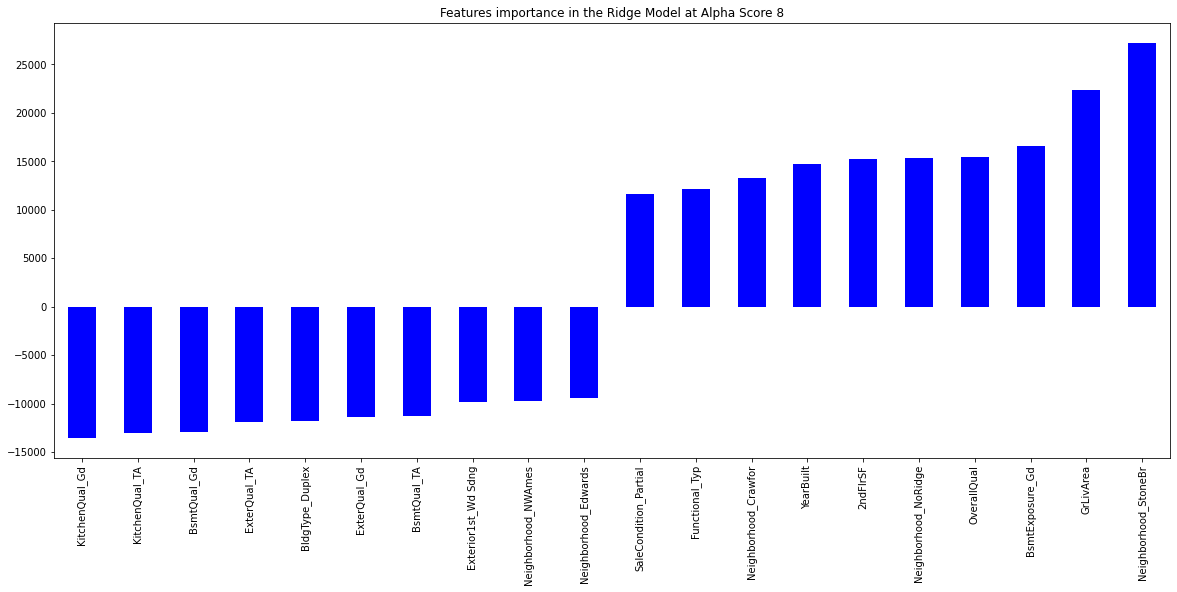

In [226]:
plt.figure(figsize=(20,8))
coefs = pd.Series(ridge_4.coef_, index = iqrdf.drop('SalePrice',axis=1).columns)
top10 = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
top10.plot(kind = "bar", color='blue')
plt.title("Features importance in the Ridge Model at Alpha Score 8")
plt.show()

Scores Calculation

In [198]:
ridge_df = pd.DataFrame({'Alpha': [0.0001,1,4],'Train Accuracy':[ridge_1.score(x_train,y_train),ridge_2.score(x_train,y_train),ridge_3.score(x_train,y_train)],
                        'Test Accuracy':[ridge_1.score(x_test,y_test),ridge_2.score(x_test,y_test),ridge_3.score(x_test,y_test)]})
ridge_df.head()

,Alpha,Train Accuracy,Test Accuracy
0,0.0001,0.943810,0.908509
1,1.0000,0.942946,0.912030
2,4.0000,0.940669,0.916267


Text(0.5, 1.0, 'Accurcaies on different Alpha values')

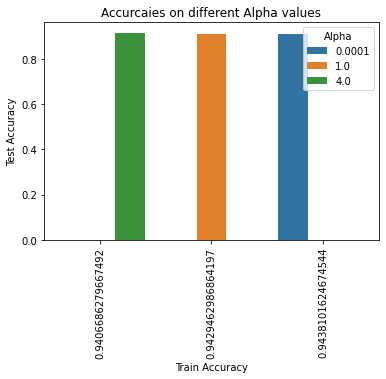

In [208]:

sns.barplot(x = 'Train Accuracy',y='Test Accuracy',hue = 'Alpha',data=ridge_df)
plt.xticks(rotation=90)
plt.title('Accurcaies on different Alpha values')

#### Lasso Regression

In [212]:
lasso = Lasso()
lr = GridSearchCV(estimator = lasso, param_grid = parameters, scoring= 'neg_mean_absolute_error', cv = 5, return_train_score=True,verbose = 1)            
lr.fit(x_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [214]:
print('The Best value of Alpha is: ',lr.best_params_)
print('The Best score achieved : ',lr.best_score_)

The Best value of Alpha is:  {'alpha': 100}
The Best score achieved :  -14636.756906662962


In [219]:
alpha =10
lr1 = Lasso(alpha=alpha)
lr1.fit(x_train, y_train) 

Lasso(alpha=10)

In [220]:
y_pred_train=lr1.predict(x_train)
y_pred_test=lr1.predict(x_test)
print('Root Mean Square Error train = ' + str(math.sqrt(sklearn_metrics.mean_squared_error(y_train, y_pred_train))))
print('Train R2 Score: ' + str(r2_score(y_train,y_pred_train)))
print('Test R2 Score: ' + str(r2_score(y_test,y_pred_test)))
print('Root Mean Square Error test = ' + str(math.sqrt(sklearn_metrics.mean_squared_error(y_test, y_pred_test)))) 

Root Mean Square Error train = 17620.856554625003
Train R2 Score: 0.942880351423479
Test R2 Score: 0.9105549696941366
Root Mean Square Error test = 24678.968882349793


In [221]:
alpha =50
lr2 = Lasso(alpha=alpha)
lr2.fit(x_train, y_train) 
y_pred_train=lr2.predict(x_train)
y_pred_test=lr2.predict(x_test)
print('Root Mean Square Error train = ' + str(math.sqrt(sklearn_metrics.mean_squared_error(y_train, y_pred_train))))
print('Train R2 Score: ' + str(r2_score(y_train,y_pred_train)))
print('Test R2 Score: ' + str(r2_score(y_test,y_pred_test)))
print('Root Mean Square Error test = ' + str(math.sqrt(sklearn_metrics.mean_squared_error(y_test, y_pred_test)))) 


Root Mean Square Error train = 18061.38676632517
Train R2 Score: 0.9399886107503274
Test R2 Score: 0.9174110705713836
Root Mean Square Error test = 23714.273311147004


#### Alpha=100

In [277]:
alpha =100
lr3 = Lasso(alpha=alpha)
lr3.fit(x_train, y_train) 
y_pred_train=lr3.predict(x_train)
y_pred_test=lr3.predict(x_test)
print('Root Mean Square Error train = ' + str(math.sqrt(sklearn_metrics.mean_squared_error(y_train, y_pred_train))))
print('Train R2 Score: ' + str(r2_score(y_train,y_pred_train)))
print('Test R2 Score: ' + str(r2_score(y_test,y_pred_test)))
print('Root Mean Square Error test = ' + str(math.sqrt(sklearn_metrics.mean_squared_error(y_test, y_pred_test)))) 


Root Mean Square Error train = 18588.404346171304
Train R2 Score: 0.9364353416330109
Test R2 Score: 0.9200199970129437
Root Mean Square Error test = 23336.708992672844


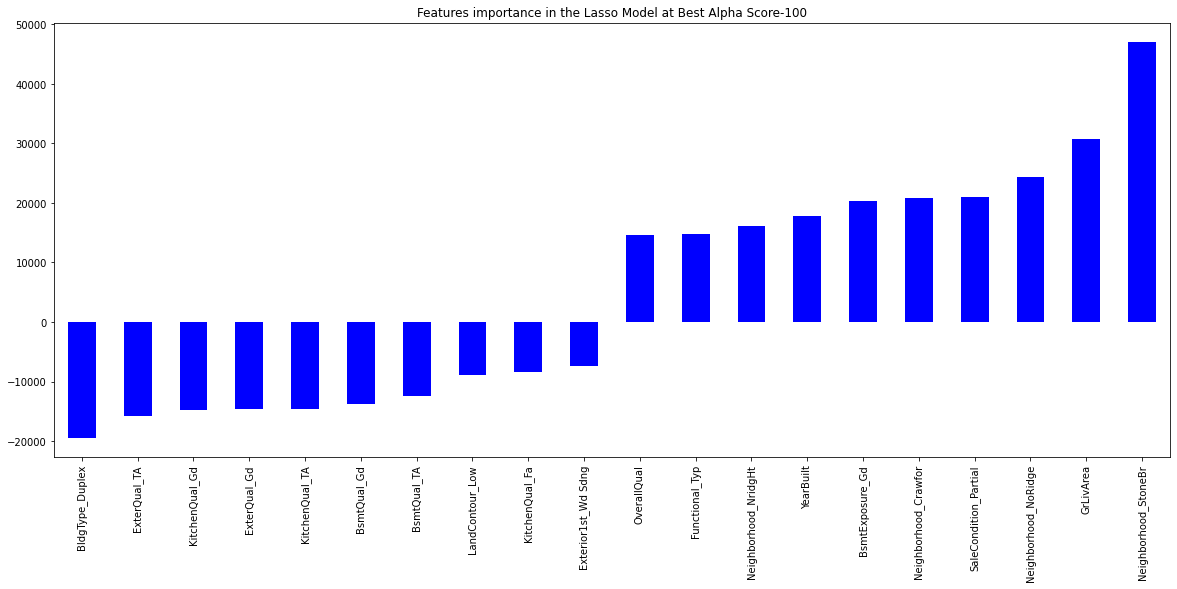

In [278]:
plt.figure(figsize=(20,8))
coefs = pd.Series(lr3.coef_, index = iqrdf.drop('SalePrice',axis=1).columns)
top10 = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
top10.plot(kind = "bar", color='blue')
plt.title("Features importance in the Lasso Model at Best Alpha Score-100")
plt.show()

#### Alpha 200

In [273]:
alpha =200
lr4 = Lasso(alpha=alpha)
lr4.fit(x_train, y_train) 
y_pred_train=lr4.predict(x_train)
y_pred_test=lr4.predict(x_test)
print('Root Mean Square Error train = ' + str(math.sqrt(sklearn_metrics.mean_squared_error(y_train, y_pred_train))))
print('Train R2 Score: ' + str(r2_score(y_train,y_pred_train)))
print('Test R2 Score: ' + str(r2_score(y_test,y_pred_test)))
print('Root Mean Square Error test = ' + str(math.sqrt(sklearn_metrics.mean_squared_error(y_test, y_pred_test)))) 


Root Mean Square Error train = 19606.53790884924
Train R2 Score: 0.9292814541172735
Test R2 Score: 0.9181355182510331
Root Mean Square Error test = 23610.036638232315


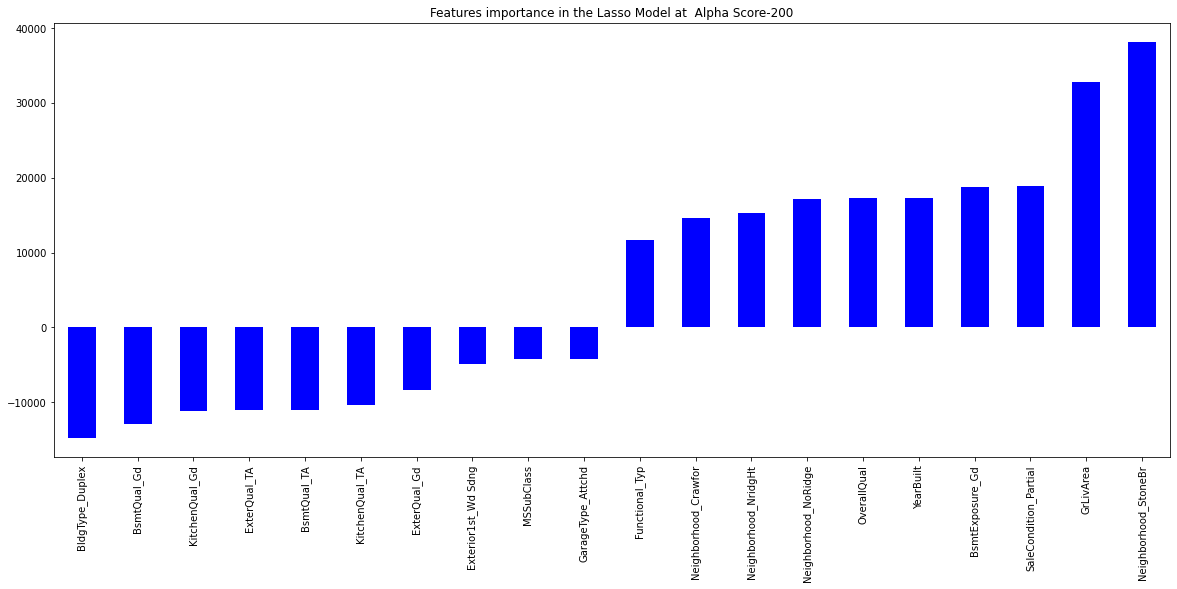

In [275]:
plt.figure(figsize=(20,8))
coefs = pd.Series(lr4.coef_, index = iqrdf.drop('SalePrice',axis=1).columns)
top10 = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
top10.plot(kind = "bar", color='blue')
plt.title("Features importance in the Lasso Model at  Alpha Score-200")
plt.show()

In [231]:
lasso_df = pd.DataFrame({'Alpha': [10,50,100],'Train Accuracy':[lr1.score(x_train,y_train),lr2.score(x_train,y_train),lr3.score(x_train,y_train)],
                        'Test Accuracy':[lr1.score(x_test,y_test),lr2.score(x_test,y_test),lr3.score(x_test,y_test)]})
lasso_df.head()

,Alpha,Train Accuracy,Test Accuracy
0,10,0.942880,0.910555
1,50,0.939989,0.917411
2,100,0.936435,0.920020


Text(0.5, 1.0, 'Accurcaies on different Alpha values on Lasso Model')

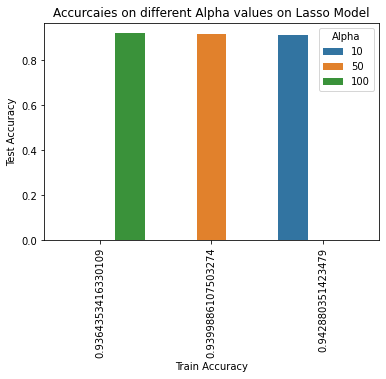

In [232]:

sns.barplot(x = 'Train Accuracy',y='Test Accuracy',hue = 'Alpha',data=lasso_df)
plt.xticks(rotation=90)
plt.title('Accurcaies on different Alpha values on Lasso Model')

#### Which Model to choose Ridge or Lasso?

In [245]:
ridge_results = pd.DataFrame(ridge_reg.cv_results_)
ridge_results = ridge_results[ridge_results['param_alpha']<=50]
ridge_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010270,0.005618,0.001028,0.000183,0.0001,{'alpha': 0.0001},-7.411475e+08,-6.343643e+08,-5.957964e+08,-3.578794e+08,-4.722867e+08,-5.602949e+08,1.327944e+08,24,-2.582792e+08,-2.593812e+08,-2.804548e+08,-3.229301e+08,-2.989358e+08,-2.839962e+08,2.457171e+07
1,0.006533,0.000221,0.001023,0.000246,0.001,{'alpha': 0.001},-7.386588e+08,-6.341580e+08,-5.955654e+08,-3.578043e+08,-4.720953e+08,-5.596563e+08,1.321310e+08,23,-2.582804e+08,-2.593817e+08,-2.804549e+08,-3.229302e+08,-2.989361e+08,-2.839967e+08,2.457142e+07
2,0.007126,0.000787,0.001008,0.000129,0.01,{'alpha': 0.01},-7.227334e+08,-6.322798e+08,-5.933212e+08,-3.570740e+08,-4.704115e+08,-5.551640e+08,1.279882e+08,22,-2.583433e+08,-2.594196e+08,-2.804631e+08,-3.229363e+08,-2.989586e+08,-2.840242e+08,2.455510e+07
3,0.006519,0.000659,0.000808,0.000057,0.05,{'alpha': 0.05},-6.992268e+08,-6.262231e+08,-5.846212e+08,-3.542123e+08,-4.652551e+08,-5.459077e+08,1.222358e+08,21,-2.587623e+08,-2.598058e+08,-2.806177e+08,-3.230558e+08,-2.992007e+08,-2.842885e+08,2.445297e+07
4,0.006536,0.000642,0.000839,0.000137,0.1,{'alpha': 0.1},-6.869430e+08,-6.211966e+08,-5.759318e+08,-3.512668e+08,-4.606108e+08,-5.391898e+08,1.194954e+08,20,-2.593161e+08,-2.603321e+08,-2.809618e+08,-3.233293e+08,-2.995727e+08,-2.847024e+08,2.435376e+07


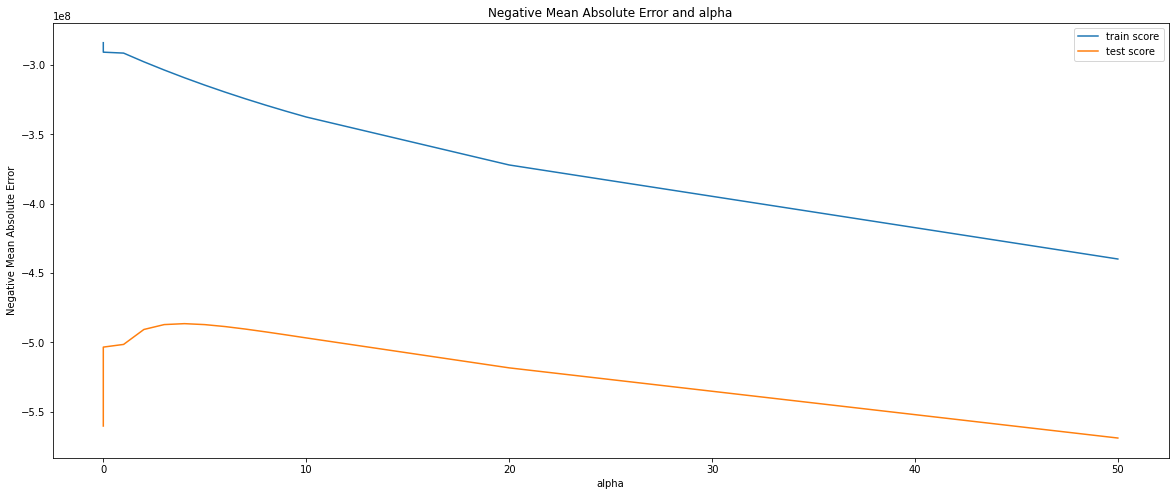

In [262]:
ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')
plt.figure(figsize=(20,8))
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In the above chart we can see the break on 4, hence Alpha=4 is justified

In [259]:
lr_results = pd.DataFrame(lr.cv_results_)
lr_results = lr_results[lr_results['param_alpha']<=400]
lr_results.head()



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.254581,0.158592,0.000903,0.000126,0.0001,{'alpha': 0.0001},-17106.587888,-16481.899832,-17445.832830,-14636.144364,-16322.078847,-16398.508752,971.286531,26,-11156.899264,-11180.222152,-11462.399568,-12283.855011,-11712.989044,-11559.273008,415.599890
1,0.190228,0.033414,0.000907,0.000085,0.001,{'alpha': 0.001},-17106.965222,-16481.250793,-17445.766936,-14635.621155,-16322.044377,-16398.329697,971.506649,25,-11156.911279,-11180.219085,-11462.394135,-12283.858240,-11712.987696,-11559.274087,415.599403
2,0.166466,0.019177,0.000875,0.000098,0.01,{'alpha': 0.01},-17110.712290,-16474.760270,-17445.098356,-14631.417379,-16321.655728,-16396.728805,973.334520,24,-11157.031342,-11180.212797,-11462.389793,-12283.891447,-11712.992692,-11559.303614,415.589455
3,0.164045,0.013250,0.000833,0.000085,0.05,{'alpha': 0.05},-17098.245370,-16445.926001,-17442.141627,-14613.453939,-16319.855402,-16383.924468,976.994661,23,-11157.602999,-11180.454178,-11462.374719,-12284.041674,-11713.076212,-11559.509956,415.494054
4,0.161455,0.009786,0.000859,0.000163,0.1,{'alpha': 0.1},-17079.893222,-16436.270859,-17438.669788,-14592.513394,-16316.919065,-16372.853266,981.084180,22,-11158.234629,-11180.856873,-11462.611350,-12284.788696,-11713.528661,-11560.004042,415.581322


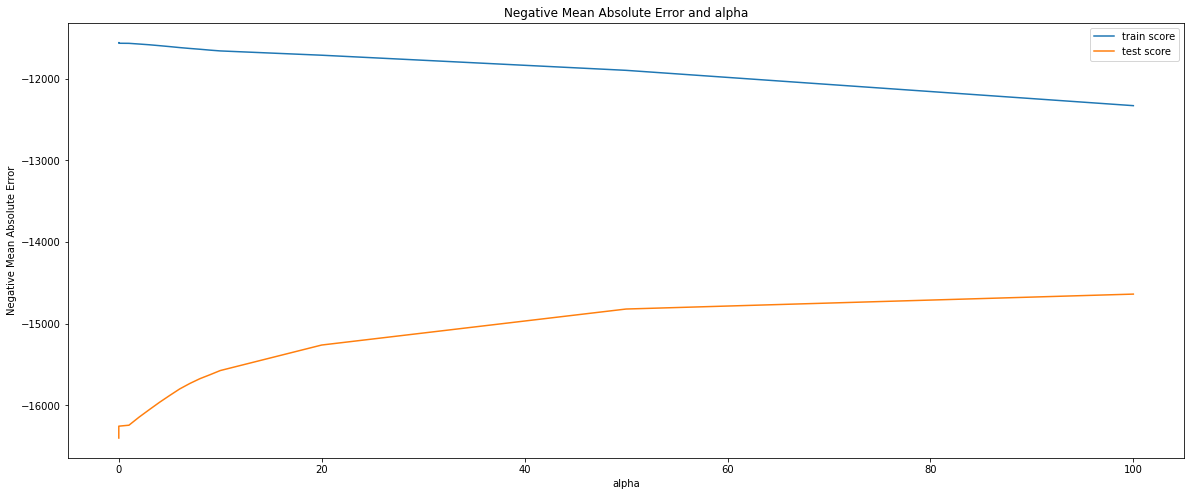

In [261]:
lr_results['param_alpha'] = lr_results['param_alpha'].astype('int32')
plt.figure(figsize=(20,8))
plt.plot(lr_results['param_alpha'], lr_results['mean_train_score'])
plt.plot(lr_results['param_alpha'], lr_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

By Looking into the both charts we can clearly see that Lasso will give us more generalised Train and Test accuracy, Hence we will choose Lasso Regression.

Assignment Part-II <br />
The following questions are the second part of the graded assignment. Please submit the answers in one PDF file. For writing normal text, please use MS Word (or similar software that can convert documents to PDF). For equations and figures, you can write/draw them on a blank sheet of paper using a pen, click images and upload them in the same Word document.

 

The final submission will be in the form of one PDF file. A sample PDF to illustrate the submission format is provided below.

Question 1 <br />

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

Answer: The optimal value of alpha for ridge regression is 4 and for lasso regression is 100. 
Lasso 200 Top 5 feature
YearBuilt                
BsmtExposure_Gd          
SaleCondition_Partial
GrLivArea               
Neighborhood_StoneBar
lasso 100 top 5 features: 
Neighborhood_Crawfor     
SaleCondition_Partial    
Neighborhood_NoRidge     
GrLivArea                
Neighborhood_StoneBr

Question 2 <br />

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?


Answer: We will choose Lasso, because the r2_score is more generalised in Lasso as compare to ridge

Question 3 <br />
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now? <br />
Functional_Typ           
Neighborhood_NridgHt     
YearBuilt                
BsmtExposure_Gd 
OverallQual

Answer:

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why? <br />
Answer: We have removed the outliers from this data and the model's test accuracy is nearer to train accuracy hence we can state that the model is more
generalise for doing the prediction. 

FUTURE WORK: <br />
We can  develop derived variable for better prediction.

In [280]:
pd.Series(lr3.coef_, index = iqrdf.drop('SalePrice',axis=1).columns).head(10)

MSSubClass      -4572.764532
LotFrontage      2344.556716
LotArea          5695.974219
OverallQual     14669.140988
OverallCond      6163.693813
YearBuilt       17822.337254
YearRemodAdd     3023.700492
MasVnrArea       3124.078843
BsmtFinSF1       6719.321337
BsmtFinSF2         -1.025580
dtype: float64

In [301]:
coefs = pd.Series(ridge_4.coef_, index = iqrdf.drop('SalePrice',axis=1).columns)

In [302]:
coefs.sort_values().tail(10)

SaleCondition_Partial    11652.579579
Functional_Typ           12173.103546
Neighborhood_Crawfor     13231.633865
YearBuilt                14662.623875
2ndFlrSF                 15279.866563
Neighborhood_NoRidge     15293.299904
OverallQual              15485.412236
BsmtExposure_Gd          16597.102869
GrLivArea                22351.598235
Neighborhood_StoneBr     27228.766499
dtype: float64

In [299]:
coefs1 = pd.Series(ridge_3.coef_, index = iqrdf.drop('SalePrice',axis=1).columns)

In [300]:
coefs1.sort_values().tail(10)

Exterior1st_BrkFace     13727.960438
Functional_Typ          13973.645773
OverallQual             14278.401990
YearBuilt               15923.237907
Neighborhood_Crawfor    16191.253121
2ndFlrSF                16818.381169
BsmtExposure_Gd         18289.968534
Neighborhood_NoRidge    18313.518628
GrLivArea               23356.668024
Neighborhood_StoneBr    34874.656295
dtype: float64

In [288]:
coefs2 = pd.Series(ridge_3.coef_, index = iqrdf.drop('SalePrice',axis=1).columns)